In [17]:
import os
import pandas as pd
import random
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [18]:
filenames = os.listdir("asl_alphabet_train/asl_alphabet_train/test")

image_height = 200
image_width = 200
image_size = (image_width,image_height)
image_channels = 3


In [19]:

categories = []
for file in filenames:
    if file[0] == 'A':
        categories.append('A')
    elif file[0] == 'B':
        categories.append('B')
    elif file[0] == 'C':
        categories.append('C')
    elif file[0] == 'D':
        categories.append('D')
    elif file[0] == 'E':
        categories.append('E')
    elif file[0] == 'F':
        categories.append('F')
    elif file[0] == 'G':
        categories.append('G')  
    elif file[0] == 'H':
        categories.append('H')   
    elif file[0] == 'I':
        categories.append('I')    
    elif file[0] == 'J':
        categories.append('J')   
    elif file[0] == 'K':
        categories.append('K')   
    elif file[0] == 'L':
        categories.append('L')  
    elif file[0] == 'M':
        categories.append('M') 
    elif file[0] == 'N':
        categories.append('N') 
    elif file[0] == 'O':
        categories.append('O')  
    elif file[0] == 'P':
        categories.append('P') 
    elif file[0] == 'Q':
        categories.append('Q')
    elif file[0] == 'R':
        categories.append('R')
    elif file[0] == 'S':
        categories.append('S')
    elif file[0] == 'T':
        categories.append('T') 
    elif file[0] == 'U':
        categories.append('U') 
    elif file[0] == 'V':
        categories.append('V') 
    elif file[0] == 'W':
        categories.append('W')    
    elif file[0] == 'X':
        categories.append('X') 
    elif file[0] == 'Y':
        categories.append('Y')  
    elif file[0] == 'Z':
        categories.append('Z')    
#print(categories)  
df = pd.DataFrame({'image':filenames,'target':categories})
        


In [20]:
df.head()

,image,target
0,A25.jpg,A
1,V14.jpg,V
2,C8.jpg,C
3,A31.jpg,A
4,V28.jpg,V


In [21]:
df.tail()

,image,target
1035,V31.jpg,V
1036,A28.jpg,A
1037,V19.jpg,V
1038,C5.jpg,C
1039,B1.jpg,B


In [22]:
df['target'].nunique()

26

In [23]:
df['target'].value_counts()

target
A    40
V    40
H    40
J    40
Q    40
W    40
B    40
N    40
F    40
D    40
I    40
P    40
G    40
K    40
R    40
E    40
U    40
Z    40
Y    40
T    40
O    40
M    40
L    40
X    40
C    40
S    40
Name: count, dtype: int64

<Axes: xlabel='target'>

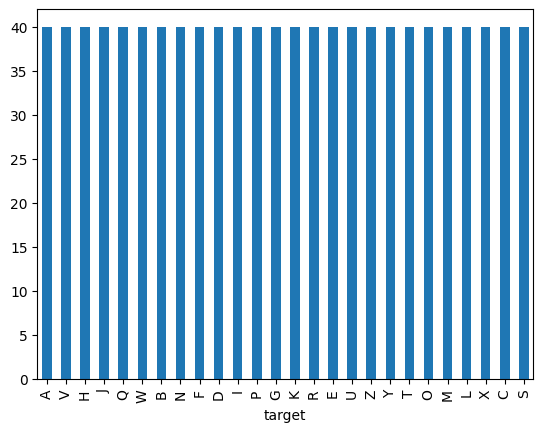

In [24]:
df['target'].value_counts().plot.bar()


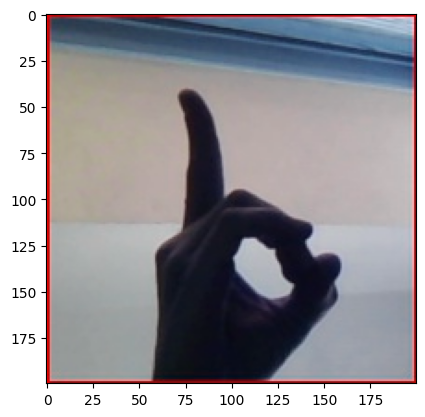

In [25]:
sample = random.choice(filenames)
image_path = os.path.join('asl_alphabet_train/asl_alphabet_train/test', sample)
sample_img = cv2.imread(image_path)
plt.imshow(sample_img)

In [26]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Activation, BatchNormalization, Flatten, Dense

In [27]:
## define model
model = Sequential()

## add first convolutional layer
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(image_height,image_width,image_channels)))

## batch normilization
model.add(BatchNormalization())

## pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

## dropout layer
model.add(Dropout(0.25))


## flatten layer
model.add(Flatten())

## hidden layer 1
model.add(Dense(400, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

## hidden layer 2
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(26, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 198, 198, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 99, 99, 32)        0         
                                                                 
 flatten (Flatten)           (None, 313632)            0         
                                                                 
 dense (Dense)               (None, 400)               1

In [28]:
from keras.callbacks import EarlyStopping

In [29]:
earlystop = EarlyStopping(patience=10)
callbacks = [earlystop]

In [30]:
## train test split
train_df, validate_df = train_test_split(df, test_size=0.3, random_state=101, stratify=df.target)

In [31]:
train_df = train_df.reset_index(drop=True)

validate_df = validate_df.reset_index(drop=True)

<Axes: xlabel='target'>

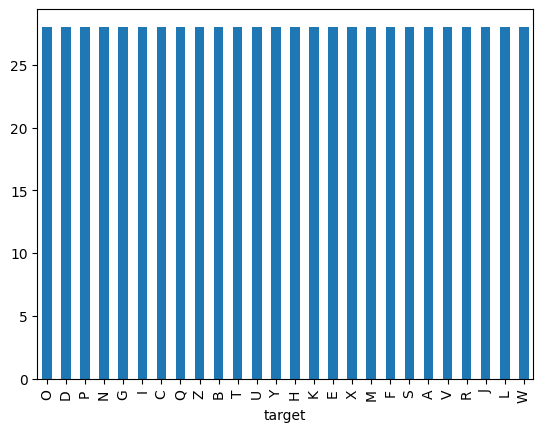

In [32]:
train_df['target'].value_counts().plot.bar()

<Axes: xlabel='target'>

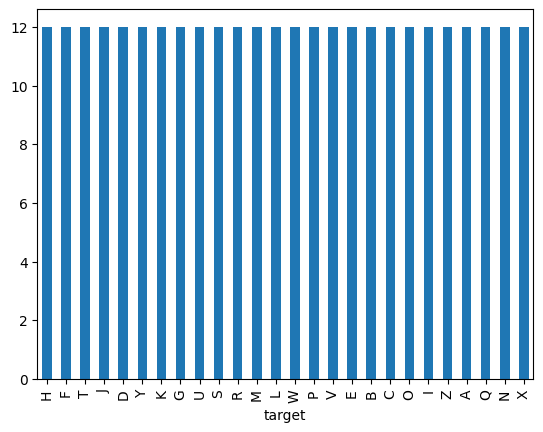

In [33]:
validate_df['target'].value_counts().plot.bar()

In [34]:
## training generator 
batch_size = 10
train_data_generator = ImageDataGenerator(rotation_range=10,
                                          rescale=1./255,
                                          shear_range=0.1,
                                          zoom_range=0.3,
                                          horizontal_flip=True,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2)

In [35]:
train_generator = train_data_generator.flow_from_dataframe(train_df,
                                                           'asl_alphabet_train/asl_alphabet_train/test',
                                                           x_col='image',
                                                           y_col='target',
                                                           target_size=image_size,
                                                           class_mode='categorical',
                                                           batch_size=batch_size)

Found 728 validated image filenames belonging to 26 classes.


In [36]:
## validation generator 
validate_data_generator = ImageDataGenerator(rescale=1./255)
validate_generator = validate_data_generator.flow_from_dataframe(validate_df,
                                                                 'asl_alphabet_train/asl_alphabet_train/test',
                                                                 x_col='image',
                                                                 y_col='target',
                                                                 target_size=image_size,
                                                                 class_mode='categorical',
                                                                 batch_size=batch_size)

Found 312 validated image filenames belonging to 26 classes.


In [37]:
example_df = train_df.sample(1).reset_index(drop=True)

In [38]:
example_generator = train_data_generator.flow_from_dataframe(example_df,
                                                             'asl_alphabet_train/asl_alphabet_train/test',
                                                             x_col='image',
                                                             y_col='target',
                                                             target_size=image_size,
                                                             class_mode='categorical')

Found 1 validated image filenames belonging to 1 classes.


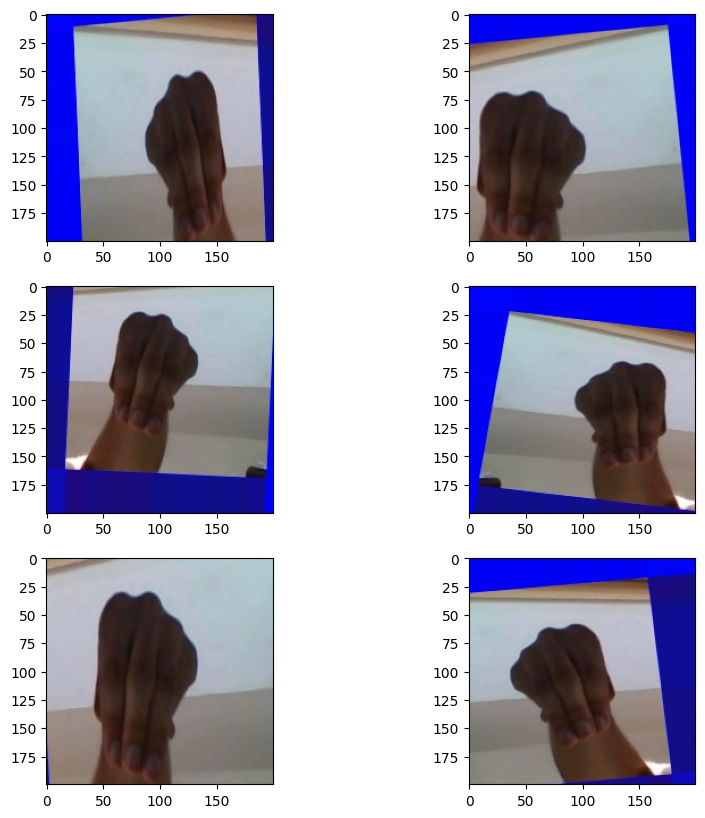

In [39]:
plt.figure(figsize=(10,10))
for i in range(0,6):
    plt.subplot(3,2,i+1)
    for X, y in example_generator:
        plt.imshow(X[0])
        
        break
plt.show()    
    

In [40]:
history = model.fit_generator(train_generator,
                              epochs=100,
                              validation_data=validate_generator)

Epoch 1/100


/var/folders/93/mr9vk9s104n71qvsfvrkf4800000gn/T/ipykernel_77070/198746949.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


73/73 [==============================] - 45s 594ms/step - loss: 3.6903 - accuracy: 0.0728 - val_loss: 3.2283 - val_accuracy: 0.0192
Epoch 2/100
73/73 [==============================] - 82s 1s/step - loss: 3.0570 - accuracy: 0.1525 - val_loss: 3.5032 - val_accuracy: 0.0673
Epoch 3/100
73/73 [==============================] - 45s 607ms/step - loss: 2.8577 - accuracy: 0.2047 - val_loss: 3.3323 - val_accuracy: 0.0833
Epoch 4/100
73/73 [==============================] - 39s 530ms/step - loss: 2.4141 - accuracy: 0.2953 - val_loss: 2.6280 - val_accuracy: 0.1410
Epoch 5/100
73/73 [==============================] - 34s 461ms/step - loss: 2.2355 - accuracy: 0.3324 - val_loss: 2.3741 - val_accuracy: 0.2244
Epoch 6/100
73/73 [==============================] - 29s 386ms/step - loss: 2.0984 - accuracy: 0.3571 - val_loss: 2.3036 - val_accuracy: 0.3141
Epoch 7/100
73/73 [==============================] - 48s 648ms/step - loss: 1.9309 - accuracy: 0.4011 - val_loss: 1.1925 - val_accuracy: 0.7372
Epoch 8

KeyboardInterrupt: 

In [ ]:
model.save_weights("signWageM1.h5")